<h3>1 - Importamos las librerías necesarias:

In [18]:
import os
os.chdir('c:\\Users\\victo\\Desktop\\EDA_victor_escudero_ramos\\EDA_victor_escudero_ramos\\src\\utils')

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from function_module import createArray

<h3>2 - Cargamos nuestro dataset:

In [20]:
df = pd.read_csv('../data/car_price.csv')
df.head()

,CarName,carbody,drivewheel,enginelocation,fueltype,aspiration,doornumber,cylindernumber,enginetype,fuelsystem,...,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,alfa-romero giulia,convertible,rwd,front,gas,std,two,four,dohc,mpfi,...,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,alfa-romero stelvio,convertible,rwd,front,gas,std,two,four,dohc,mpfi,...,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,alfa-romero Quadrifoglio,hatchback,rwd,front,gas,std,two,six,ohcv,mpfi,...,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,audi 100 ls,sedan,fwd,front,gas,std,four,four,ohc,mpfi,...,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,audi 100ls,sedan,4wd,front,gas,std,four,five,ohc,mpfi,...,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


<h3>3 - Reemplazamos los valores de tipo string por valores númericos

In [22]:
# doornumber
df['doornumber'] = df['doornumber'].replace('two',2)
df['doornumber'] = df['doornumber'].replace('four',4)

#cylindernumber
df['cylindernumber'] = df['cylindernumber'].replace('four', 4)
df['cylindernumber'] = df['cylindernumber'].replace('six', 6)
df['cylindernumber'] = df['cylindernumber'].replace('five', 5)
df['cylindernumber'] = df['cylindernumber'].replace('three', 3)
df['cylindernumber'] = df['cylindernumber'].replace('twelve', 12)
df['cylindernumber'] = df['cylindernumber'].replace('two', 2)
df['cylindernumber'] = df['cylindernumber'].replace('eight', 8)

#fueltype
df['fueltype'] = df['fueltype'].replace('gas',0)
df['fueltype'] = df['fueltype'].replace('diesel',1)

#aspiration
df['aspiration'] = df['aspiration'].replace('std',0)
df['aspiration'] = df['aspiration'].replace('turbo',1)

#enginelocation
df['enginelocation'] = df['enginelocation'].replace('front',0)
df['enginelocation'] = df['enginelocation'].replace('rear',1)

#drivewheel
df['drivewheel'] = df['drivewheel'].replace('fwd',0)
df['drivewheel'] = df['drivewheel'].replace('rwd',1)
df['drivewheel'] = df['drivewheel'].replace('4wd',2)

<h3>4 - Seleccionamos las columnas con valores númericos para hacer un análisis preparatorio:

In [23]:
columns = ['drivewheel', 'enginelocation', 'fueltype',
       'aspiration', 'doornumber', 'cylindernumber', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price']

df_2 = df[columns]

<h3>5 - Creamos una matriz de correlación para sacar conclusiones:

<AxesSubplot:>

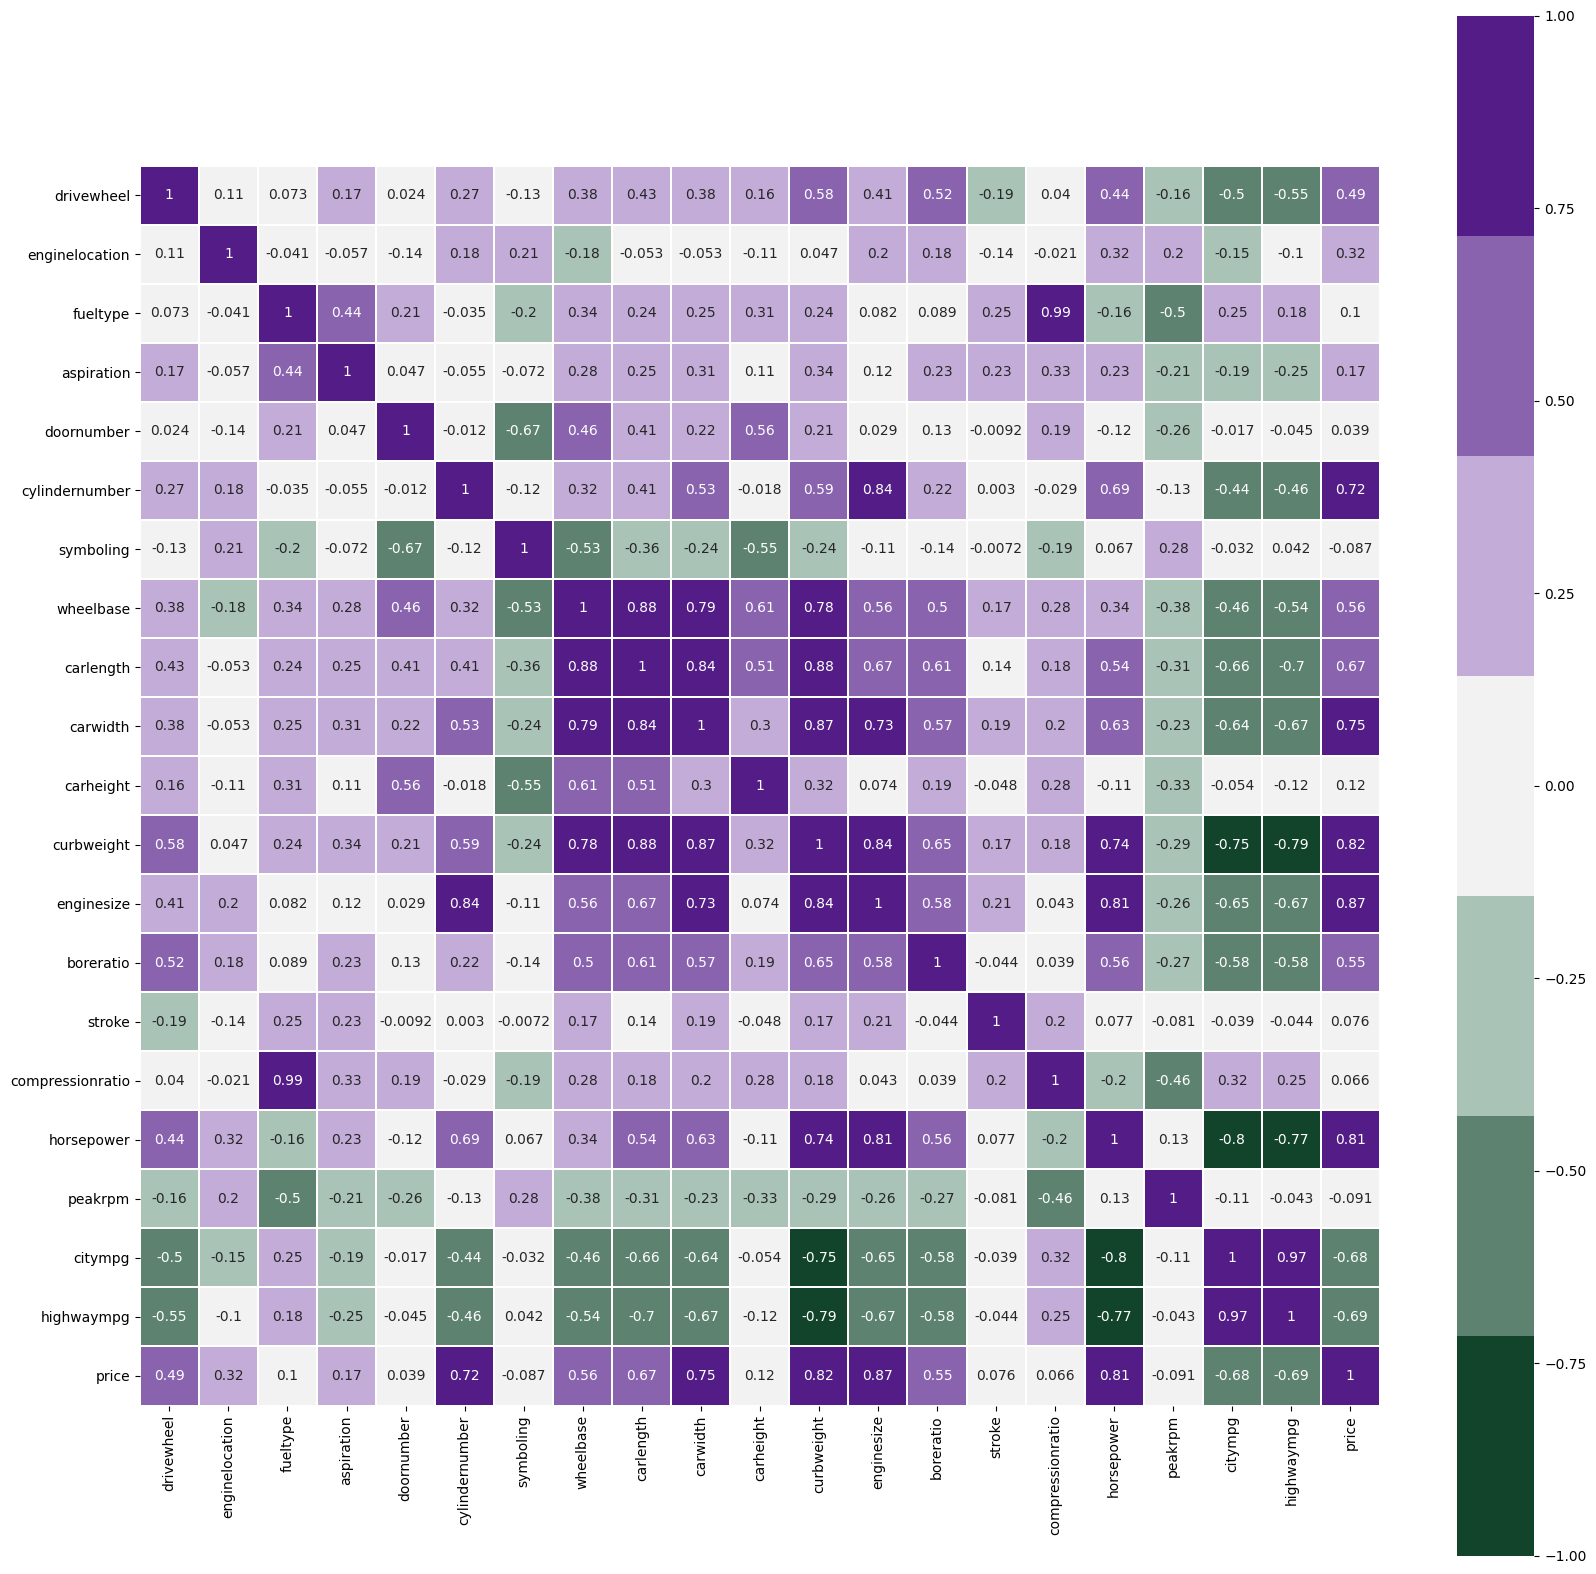

In [24]:
plt.figure(figsize=(20,20))
sns.heatmap(df_2.corr(),
            vmin=-1,
            vmax=1,
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7),
            square=True,
            linewidths=.1,
            annot=True)


<h3>6 - Sacamos conclusiones a partir de las observaciones dadas por la matriz de confusión:</h3>

1. Eliminamos las columnas de 'carwidth' y 'carheight' por su fuerte correlación con 'wheelbase', ya que el ancho de un coche está determinado por la distancia entre sus ejes.

2. Dado que el numero de cilindradas (cylindernumber) repercute directamente en el tamaño del motor (enginesize), quitamos enginesize de nuestro dataset. A mayor cilindrada, mayor será el tamaño del motor.

3. Como la relación entre el tipo de combustible ('fueltype') y el ratio del compresor del motor ('compressionratio') está diréctamente relacionada con el tipo de combustible, quitamos la columna de 'compressionratio'.

4. Las variables 'citympg' y 'highwaympg' determinan la cantidad de combustible que se gasta por milla, (millas por galón). Ambas tienen correlaciones negativas con el peso del vehículo ('curbweight'), con el tamaño del motor ('enginesize') y con los caballos ('horsepower').
Además se observa correlación negativa con el precio y podemos deducir que a menor gasto de combustible por milla menor será el precio final de un vehículo.

5. Como la correlación entre citympg y highwaympg es practicamente de 1:1, sumaremos ambas columnas para sacar la media de ambas y crearemos una nueva variable llamada 'mpg_avg' (Media de millas por galón).

6. Observamos una correlación negativa entre el número de puertas y Symboling.
Symboling indica de forma ascendente el nivel de riegos al asegurar un coche.
Para asegurar un coche, las aseguradoras tiene una cláusula que a menor número de puertas más cuesta asegurar un vehículo.

7. Aunque la variable curbweight (peso en vacio) este fuertemente relacionada con el precio final de un coche, observamos en la matriz de correlación que el peso viene dado por la suma de otras variables fundamentales de los vehículos, tales como el motor, la cilindrada... etc, por lo que es simplemente un causa del resto de variables, así que no la tendremos en cuenta para nuestro análisis.

<h3>7 - Correlaciones con nuestra variable target:

Observamos que las siguientes variables tienen correlación con el precio:
* mpg_avg
* cylindernumber
* horsepower
* drivewheels
* wheelbase

<h3>8 - Nos quedamos con las variables más importantes:


Como la cilindrada se calcula a partir del stroke y el boreratio descartamos esas columnas.

Artículo del que hemos sacado la información:

Relación bore stroke:
https://www.motociclismo.es/consejos/mantenimiento/diametro-por-carrera-nzm_263043_102.html

In [25]:
columns = ['CarName','carbody', 'drivewheel', 'fueltype', 'doornumber', 
           'cylindernumber', 'symboling', 'wheelbase',
           'horsepower','citympg', 'highwaympg', 'price', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'compressionratio']

df_final = df[columns]

df_final

,CarName,carbody,drivewheel,fueltype,doornumber,cylindernumber,symboling,wheelbase,horsepower,citympg,highwaympg,price,carlength,carwidth,carheight,curbweight,enginesize,compressionratio
0,alfa-romero giulia,convertible,1,0,2,4,3,88.6,111,21,27,13495.0,168.8,64.1,48.8,2548,130,9.0
1,alfa-romero stelvio,convertible,1,0,2,4,3,88.6,111,21,27,16500.0,168.8,64.1,48.8,2548,130,9.0
2,alfa-romero Quadrifoglio,hatchback,1,0,2,6,1,94.5,154,19,26,16500.0,171.2,65.5,52.4,2823,152,9.0
3,audi 100 ls,sedan,0,0,4,4,2,99.8,102,24,30,13950.0,176.6,66.2,54.3,2337,109,10.0
4,audi 100ls,sedan,2,0,4,5,2,99.4,115,18,22,17450.0,176.6,66.4,54.3,2824,136,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,bmw x3,sedan,1,0,4,6,0,101.2,121,21,28,21105.0,176.8,64.8,54.3,2765,164,9.0
206,mitsubishi g4,hatchback,0,0,2,4,3,96.3,88,25,32,8499.0,173.0,65.4,49.4,2328,122,8.5
207,peugeot 304,sedan,1,1,4,4,0,107.9,95,28,33,13200.0,186.7,68.4,56.7,3197,152,21.0
208,peugeot 504 (sw),wagon,1,0,4,4,0,114.2,97,19,24,12440.0,198.9,68.4,58.7,3230,120,8.4


<h3>9 - Creamos la columna MPG_AVG:

In [26]:
citympg = list(df_final['citympg'])
highwaympg = list(df_final['highwaympg'])

mpg_avg = createArray(citympg, highwaympg)

df_final['mpg_avg'] = pd.Series(mpg_avg)

C:\Users\victo\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [27]:
df_final

,CarName,carbody,drivewheel,fueltype,doornumber,cylindernumber,symboling,wheelbase,horsepower,citympg,highwaympg,price,carlength,carwidth,carheight,curbweight,enginesize,compressionratio,mpg_avg
0,alfa-romero giulia,convertible,1,0,2,4,3,88.6,111,21,27,13495.0,168.8,64.1,48.8,2548,130,9.0,24.0
1,alfa-romero stelvio,convertible,1,0,2,4,3,88.6,111,21,27,16500.0,168.8,64.1,48.8,2548,130,9.0,24.0
2,alfa-romero Quadrifoglio,hatchback,1,0,2,6,1,94.5,154,19,26,16500.0,171.2,65.5,52.4,2823,152,9.0,22.5
3,audi 100 ls,sedan,0,0,4,4,2,99.8,102,24,30,13950.0,176.6,66.2,54.3,2337,109,10.0,27.0
4,audi 100ls,sedan,2,0,4,5,2,99.4,115,18,22,17450.0,176.6,66.4,54.3,2824,136,8.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,bmw x3,sedan,1,0,4,6,0,101.2,121,21,28,21105.0,176.8,64.8,54.3,2765,164,9.0,24.5
206,mitsubishi g4,hatchback,0,0,2,4,3,96.3,88,25,32,8499.0,173.0,65.4,49.4,2328,122,8.5,28.5
207,peugeot 304,sedan,1,1,4,4,0,107.9,95,28,33,13200.0,186.7,68.4,56.7,3197,152,21.0,30.5
208,peugeot 504 (sw),wagon,1,0,4,4,0,114.2,97,19,24,12440.0,198.9,68.4,58.7,3230,120,8.4,21.5


<h3>10 - Elinamos las columnas de 'citympg' y 'highwaympg'

In [28]:
df_final = df_final.drop(['citympg', 'highwaympg'], axis=1)

<h3>11 - Comprobamos nuestro dataset final

<h4>Comprobamos si hay nulos

In [29]:
df_final.isnull().values.any()

False

In [30]:
df_final.isna().values.any()

False

<h4> Eliminamos 5 datos duplicados que hemos encontrado en nuestro dataset:

In [31]:
df_final = df_final.drop_duplicates()

<h3>12 - Exportamos nuestro dataset limpio para su posterior análisis:

In [32]:
df_final

,CarName,carbody,drivewheel,fueltype,doornumber,cylindernumber,symboling,wheelbase,horsepower,price,carlength,carwidth,carheight,curbweight,enginesize,compressionratio,mpg_avg
0,alfa-romero giulia,convertible,1,0,2,4,3,88.6,111,13495.0,168.8,64.1,48.8,2548,130,9.0,24.0
1,alfa-romero stelvio,convertible,1,0,2,4,3,88.6,111,16500.0,168.8,64.1,48.8,2548,130,9.0,24.0
2,alfa-romero Quadrifoglio,hatchback,1,0,2,6,1,94.5,154,16500.0,171.2,65.5,52.4,2823,152,9.0,22.5
3,audi 100 ls,sedan,0,0,4,4,2,99.8,102,13950.0,176.6,66.2,54.3,2337,109,10.0,27.0
4,audi 100ls,sedan,2,0,4,5,2,99.4,115,17450.0,176.6,66.4,54.3,2824,136,8.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo 145e (sw),sedan,1,0,4,4,-1,109.1,114,16845.0,188.8,68.9,55.5,2952,141,9.5,25.5
201,volvo 144ea,sedan,1,0,4,4,-1,109.1,160,19045.0,188.8,68.8,55.5,3049,141,8.7,22.0
202,volvo 244dl,sedan,1,0,4,6,-1,109.1,134,21485.0,188.8,68.9,55.5,3012,173,8.8,20.5
203,volvo 246,sedan,1,1,4,6,-1,109.1,106,22470.0,188.8,68.9,55.5,3217,145,23.0,26.5


In [33]:
df_final.to_csv('../data/car_price_clean.csv')